In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1

In [4]:
a = 1.5
b = 2.1
sigma = 0.5

x = np.linspace(1, 7, 7)
eps = np.random.normal(loc=0, scale=sigma, size=len(x))
y = a*x + b + eps

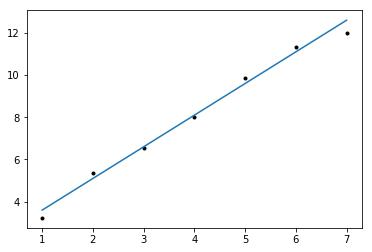

In [5]:
plt.plot(x,y, 'k.')
plt.plot(x, a*x + b)

In [6]:
x

array([1., 2., 3., 4., 5., 6., 7.])

In [7]:
y

array([ 3.22972587,  5.37855268,  6.53738188,  7.99598614,  9.85723892,
       11.34670543, 11.97941263])

## Problem 3

In [35]:
mu = 120
sigma = 10
x = np.random.normal(size=7) * sigma + mu
print(x)

[111.74895025 110.60431817 115.28335826 130.78237675 123.92276732
 113.89210051  96.34180979]


## Problem 4

In [27]:
sigma = 200
sigma_group = 500
mu_overall = 2500

group_mus = mu_overall + np.random.normal(size=3) * sigma_group

In [28]:
group_mus

array([2577.00105322, 1692.22742661, 1509.53474104])

In [30]:
plants_in_groups = [4, 6, 3]
groups = []
for n, mu in zip(plants_in_groups, group_mus):
    groups.append(mu + np.random.normal(size=n) * sigma)

In [31]:
groups

[array([2603.77028549, 2665.292078  , 2251.261876  , 2510.15775133]),
 array([1558.72110143, 1728.68097843, 1865.72775535, 1413.52330867,
        1158.81381311, 1691.86795088]),
 array([1527.73185301, 1443.51857169, 1041.14137785])]

## Problem 6

In [36]:
from scipy.special import gamma

In [84]:
c = 5
s = 2
x = np.linspace(-100, 100, 1000000)
dx = x[1] - x[0]
p = 2 / (gamma(1/4) * s) * np.exp(-((x-c)/s)**4)
cdf = []
tot = 0
for idx in range(0, len(p), 1):
    tot += p[idx] * dx
    cdf.append(tot)

In [92]:
(gamma(1/4)) / 2

1.812804954110954

(2, 8)

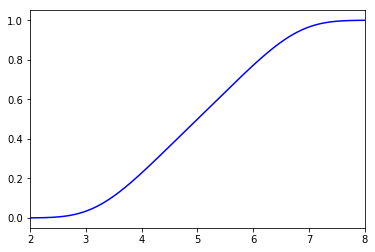

In [87]:
plt.plot(x, cdf, 'b-')
plt.xlim([2, 8])

(2, 8)

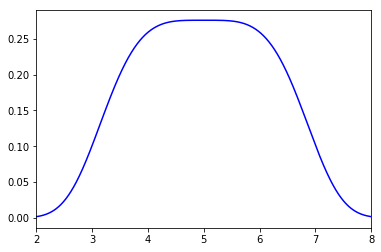

In [88]:
plt.plot(x, p, 'b-')
plt.xlim([2, 8])

In [89]:
samples = []
for i in range(10):
    c = np.random.random()
    j = 0
    while cdf[j] < c:
        j += 1
    samples.append(x[j])

In [90]:
samples

[4.346904346904353,
 4.909504909504918,
 6.203506203506208,
 3.56510356510357,
 4.4329044329044365,
 3.9771039771039796,
 3.8345038345038347,
 4.754904754904757,
 5.540505540505549,
 6.388906388906392]

## Problem 7

In [22]:
high = 13
low =2

(high - low) * np.random.random(size=5) + low

array([8.15458191, 6.27163055, 3.58291333, 7.0957596 , 6.46921607])

## Problem 8

In [93]:
from scipy.stats import norm, cauchy

In [129]:
pi = 0.3
c = 0
sigma = 1
s = 5
samples = []
labels = []
for _ in range(12):
    if np.random.random() < pi:
        label = 'cauchy'
        x = cauchy.rvs(loc=c, scale=s)
    else:
        label = 'gauss'
        x = norm.rvs(loc=c, scale=sigma)
    labels.append(label)
    samples.append(x)

In [130]:
list(zip(labels, samples))

[('gauss', -1.3218434903560539),
 ('cauchy', -8.173690215411087),
 ('cauchy', -0.21320773043048166),
 ('gauss', -0.7277216145366113),
 ('cauchy', 5.784358761004032),
 ('gauss', 1.7494602058257083),
 ('gauss', -0.2886950427991223),
 ('gauss', -0.3361810242126585),
 ('gauss', -0.5207289506698818),
 ('gauss', 1.2867805788363982),
 ('gauss', -0.5967120310574633),
 ('gauss', 0.28439040249139724)]

## Problem 10

In [135]:
from scipy.stats import expon

In [286]:
floor = 20
mu = 50
sigma = 20
x_plus = 5

labels = []
samples = []
for _ in range(4000):
    x_true = norm.rvs(loc=mu, scale=sigma)
    x_round = int(np.round(x_true))
    if x_true < floor:
        label = 'exp'
        x = floor + expon.rvs(scale=x_plus)
    else:
        label = 'norm'
        x = x_true
    labels.append(label)
    samples.append(x)
    
labels = np.array(labels)
samples = np.array(samples)

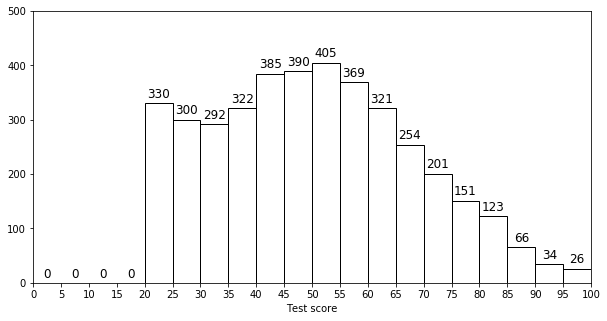

In [318]:
fig = plt.figure(figsize=(10,5))
h = plt.hist(samples, bins=range(0, 105, 5), edgecolor='k', facecolor='none')
plt.xlim([0, 100])
plt.xlabel('Test score')
for b, n in zip(h[1][:-1], h[0]):
    plt.text(b+2.5, n+10, str(int(n)), ha = 'center', fontsize=12)
plt.gca().set_xticks(range(0, 105, 5))
plt.ylim([0, 500])
plt.show()
fig.savefig('./test-scores.pdf', bbox_inches='tight')

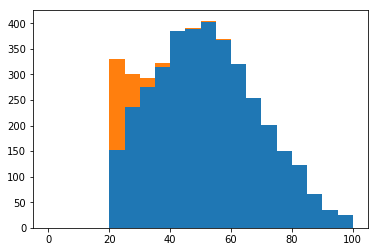

In [288]:
plt.hist([samples[labels=='norm'],
         samples[labels=='exp']], 
         bins=range(0, 105, 5), stacked=True)

plt.show()

In [284]:
h

(array([  0.,   0.,   0.,  13., 310., 243., 293., 357., 360., 371., 408.,
        389., 315., 278., 214., 160., 101.,  72.,  50.,  34.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100]),
 <a list of 20 Patch objects>)

In [265]:
sum(h[0])

3955.0

In [266]:
np.sum(h[1])

1020

In [278]:
records = []
for idx in range(len(h[0])):
    record = str(h[1][idx]) + '-' + str(h[1][idx+1]) + ':&& ' + str(int(h[0][idx])) + r'\\'
    records.append(record)

In [279]:
print('\n'.join(records))

20-25:&& 310\\
25-30:&& 243\\
30-35:&& 293\\
35-40:&& 357\\
40-45:&& 360\\
45-50:&& 371\\
50-55:&& 408\\
55-60:&& 389\\
60-65:&& 315\\
65-70:&& 278\\
70-75:&& 214\\
75-80:&& 160\\
80-85:&& 101\\
85-90:&& 72\\
90-95:&& 50\\
95-100:&& 34\\
